In [1]:
!pip install q keras==2.1.5

  Found existing installation: Keras 2.2.4
    Uninstalling Keras-2.2.4:
      Successfully uninstalled Keras-2.2.4


In [2]:
# %tensorflow_version 1.x

In [3]:
import Ipynb_importer
import keras
# from tensorflow import keras
from keras import backend as K
from keras.optimizers import Optimizer
from keras import optimizers
from keras.layers import Conv2D, MaxPooling2D, Dropout, Dense, Flatten
from keras.models import Sequential
import numpy as np
from keras.optimizers import Adam, SGD
from keras.callbacks import ModelCheckpoint
import tensorflow as tf

from keras.preprocessing.image import ImageDataGenerator
from optimizers import MaSS
from cifar10 import load
from resnet import resnet_v1, resnet_v2
import os

os.environ["CUDA_VISIBLE_DEVICES"]="0,1" 

Using TensorFlow backend.


In [3]:
tf.__version__

'1.14.0'

In [8]:
keras.__version__

'2.1.5'

In [9]:
os.environ["CUDA_VISIBLE_DEVICES"]="0,1" 
batch_size = 64
epochs = 150
data_augmentation = True
num_classes = 10
learning_rate=0.01
# Load Cifar-10 data
(x_train, y_train), (x_test, y_test) = load()
input_shape = x_train.shape[1:]

# Model parameters
n = 5
version = 1
if version == 1:
    depth = n * 6 + 2
elif version == 2:
    depth = n * 9 + 2

# Model name, depth and version
model_type = 'ResNet%dv%d' % (depth, version)
##############################################################################
#CNN
class Lenet:
      def neural(channel,height,width,classes):
              input_shape = (channel,height,width)
              if K.image_data_format() == "channels_last":input_shape = (height,width,channel)
              model = Sequential()
              model.add(Conv2D(64,(5,5),padding="same",activation="relu",input_shape=input_shape,name="conv1"))
              model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2),name="pool1"))

              model.add(Conv2D(64,(5,5),padding="same",activation="relu",name="conv2",))
              model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2),name="pool2"))

              model.add(Conv2D(128,(5,5),padding="same",activation="relu",name="conv3",))
              model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2),name="pool3"))

              model.add(Flatten())
              model.add(Dense(128,activation="relu",name="fc1"))
              model.add(Dense(classes,activation="softmax",name="fc2"))
              return model
################################################################
#仅测试resNet 50 epochs
################################################################
# Build model
channel = 3
height = 32
width = 32
class_num = 10
norm_size = 32

model = Lenet.neural(channel=channel, height=height,width=width, classes=class_num)#网络
# model = resnet_v1(input_shape=input_shape, depth=depth)
mass = MaSS(lr = learning_rate, alpha = 0.05, kappa_t = 3)
model.compile(loss='categorical_crossentropy',
              optimizer=mass,
              metrics=['accuracy'])
model.summary()

# Prepare model saving directory.
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'cifar10_%s_model_mass.{epoch:03d}.h5' % model_type
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
filepath = os.path.join(save_dir, model_name)
checkpoint = ModelCheckpoint(filepath=filepath,
                             monitor='val_acc',
                             verbose=1,
                             save_best_only=False)
callbacks = [checkpoint]

# Training
if not data_augmentation:
    result1 = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True,
              callbacks=callbacks)
else:
    print('Using real-time data augmentation.')

    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,           	# set input mean to 0 over the dataset
        samplewise_center=False,            	# set each sample mean to 0        
        featurewise_std_normalization=False,    # divide inputs by std of dataset        
        samplewise_std_normalization=False,     # divide each input by its std
        zca_whitening=False,                    # apply ZCA whitening        
        rotation_range=0,                       # randomly rotate images in the range (deg 0 to 180)        
        width_shift_range=0.1,                  # randomly shift images horizontally        
        height_shift_range=0.1,                 # randomly shift images vertically        
        horizontal_flip=True,                   # randomly flip images        
        vertical_flip=False)                    # randomly flip images

    res1 = datagen.fit(x_train)
    # Fit the model on the batches generated by datagen.flow().
    result1 = model.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size),
                        validation_data=(x_test, y_test),
                        epochs=epochs, verbose=1, workers=4,
                                 callbacks=callbacks)

Load CIFAR-10 dataset.
x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples
y_train shape: (50000, 1)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv2D)               (None, 32, 32, 64)        4864      
_________________________________________________________________
pool1 (MaxPooling2D)         (None, 16, 16, 64)        0         
_________________________________________________________________
conv2 (Conv2D)               (None, 16, 16, 64)        102464    
_________________________________________________________________
pool2 (MaxPooling2D)         (None, 8, 8, 64)          0         
_________________________________________________________________
conv3 (Conv2D)               (None, 8, 8, 128)         204928    
_________________________________________________________________
pool3 (MaxPooling2D)         (None, 4, 4, 128)         0         
____________________

782/782 [==============================] - 9s 11ms/step - loss: 0.3795 - acc: 0.8654 - val_loss: 0.5899 - val_acc: 0.8150

Epoch 00029: saving model to C:\Users\dy1y19\saved_models\cifar10_ResNet32v1_model_mass.029.h5
Epoch 30/150
782/782 [==============================] - 9s 11ms/step - loss: 0.3716 - acc: 0.8683 - val_loss: 0.5732 - val_acc: 0.8156

Epoch 00030: saving model to C:\Users\dy1y19\saved_models\cifar10_ResNet32v1_model_mass.030.h5
Epoch 31/150
782/782 [==============================] - 9s 11ms/step - loss: 0.3637 - acc: 0.8706 - val_loss: 0.6043 - val_acc: 0.8091

Epoch 00031: saving model to C:\Users\dy1y19\saved_models\cifar10_ResNet32v1_model_mass.031.h5
Epoch 32/150
782/782 [==============================] - 9s 11ms/step - loss: 0.3564 - acc: 0.8766 - val_loss: 0.6002 - val_acc: 0.8095

Epoch 00032: saving model to C:\Users\dy1y19\saved_models\cifar10_ResNet32v1_model_mass.032.h5
Epoch 33/150
782/782 [==============================] - 9s 11ms/step - loss: 0.3440 - acc

782/782 [==============================] - 9s 11ms/step - loss: 0.1918 - acc: 0.9330 - val_loss: 0.6714 - val_acc: 0.8272

Epoch 00064: saving model to C:\Users\dy1y19\saved_models\cifar10_ResNet32v1_model_mass.064.h5
Epoch 65/150
782/782 [==============================] - 9s 11ms/step - loss: 0.1887 - acc: 0.9332 - val_loss: 0.6639 - val_acc: 0.8299

Epoch 00065: saving model to C:\Users\dy1y19\saved_models\cifar10_ResNet32v1_model_mass.065.h5
Epoch 66/150
782/782 [==============================] - 9s 11ms/step - loss: 0.1888 - acc: 0.9319 - val_loss: 0.6462 - val_acc: 0.8275- acc: 0.

Epoch 00066: saving model to C:\Users\dy1y19\saved_models\cifar10_ResNet32v1_model_mass.066.h5
Epoch 67/150
782/782 [==============================] - 9s 11ms/step - loss: 0.1870 - acc: 0.9334 - val_loss: 0.6490 - val_acc: 0.8276

Epoch 00067: saving model to C:\Users\dy1y19\saved_models\cifar10_ResNet32v1_model_mass.067.h5
Epoch 68/150
782/782 [==============================] - 9s 11ms/step - loss: 0.1


Epoch 00099: saving model to C:\Users\dy1y19\saved_models\cifar10_ResNet32v1_model_mass.099.h5
Epoch 100/150
782/782 [==============================] - 9s 11ms/step - loss: 0.1195 - acc: 0.9584 - val_loss: 0.7798 - val_acc: 0.8326

Epoch 00100: saving model to C:\Users\dy1y19\saved_models\cifar10_ResNet32v1_model_mass.100.h5
Epoch 101/150
782/782 [==============================] - 9s 11ms/step - loss: 0.1171 - acc: 0.9589 - val_loss: 0.7578 - val_acc: 0.8352

Epoch 00101: saving model to C:\Users\dy1y19\saved_models\cifar10_ResNet32v1_model_mass.101.h5
Epoch 102/150
782/782 [==============================] - 9s 11ms/step - loss: 0.1190 - acc: 0.9586 - val_loss: 0.7778 - val_acc: 0.8353

Epoch 00102: saving model to C:\Users\dy1y19\saved_models\cifar10_ResNet32v1_model_mass.102.h5
Epoch 103/150
782/782 [==============================] - 9s 11ms/step - loss: 0.1186 - acc: 0.9577 - val_loss: 0.7270 - val_acc: 0.8387

Epoch 00103: saving model to C:\Users\dy1y19\saved_models\cifar10_ResNe

782/782 [==============================] - 9s 11ms/step - loss: 0.0831 - acc: 0.9713 - val_loss: 0.8509 - val_acc: 0.8367

Epoch 00135: saving model to C:\Users\dy1y19\saved_models\cifar10_ResNet32v1_model_mass.135.h5
Epoch 136/150
782/782 [==============================] - 9s 11ms/step - loss: 0.0866 - acc: 0.9692 - val_loss: 0.8693 - val_acc: 0.8376

Epoch 00136: saving model to C:\Users\dy1y19\saved_models\cifar10_ResNet32v1_model_mass.136.h5
Epoch 137/150
782/782 [==============================] - 9s 11ms/step - loss: 0.0895 - acc: 0.9689 - val_loss: 0.8553 - val_acc: 0.8406

Epoch 00137: saving model to C:\Users\dy1y19\saved_models\cifar10_ResNet32v1_model_mass.137.h5
Epoch 138/150
782/782 [==============================] - 9s 11ms/step - loss: 0.0874 - acc: 0.9689 - val_loss: 0.8929 - val_acc: 0.8383

Epoch 00138: saving model to C:\Users\dy1y19\saved_models\cifar10_ResNet32v1_model_mass.138.h5
Epoch 139/150
782/782 [==============================] - 9s 11ms/step - loss: 0.0883 -

In [10]:
!pip install matplotlib

In [11]:
import matplotlib.pyplot as plt

plt.plot(result1.history['acc'])
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

In [12]:
# Build model
channel = 3
height = 32
width = 32
class_num = 10
norm_size = 32

model = Lenet.neural(channel=channel, height=height,width=width, classes=class_num)#网络
# model = resnet_v1(input_shape=input_shape, depth=depth)
mass = MaSS(lr = learning_rate, alpha = 0.05, kappa_t = 12)
model.compile(loss='categorical_crossentropy',
              optimizer=mass,
              metrics=['accuracy'])
model.summary()

# Prepare model saving directory.
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'cifar10_%s_model_mass.{epoch:03d}.h5' % model_type
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
filepath = os.path.join(save_dir, model_name)
checkpoint = ModelCheckpoint(filepath=filepath,
                             monitor='val_acc',
                             verbose=1,
                             save_best_only=False)
callbacks = [checkpoint]

# Training
if not data_augmentation:
    result1_1 = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True,
              callbacks=callbacks)
else:
    print('Using real-time data augmentation.')

    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,           	# set input mean to 0 over the dataset
        samplewise_center=False,            	# set each sample mean to 0        
        featurewise_std_normalization=False,    # divide inputs by std of dataset        
        samplewise_std_normalization=False,     # divide each input by its std
        zca_whitening=False,                    # apply ZCA whitening        
        rotation_range=0,                       # randomly rotate images in the range (deg 0 to 180)        
        width_shift_range=0.1,                  # randomly shift images horizontally        
        height_shift_range=0.1,                 # randomly shift images vertically        
        horizontal_flip=True,                   # randomly flip images        
        vertical_flip=False)                    # randomly flip images

    res1_1 = datagen.fit(x_train)
    # Fit the model on the batches generated by datagen.flow().
    result1_1 = model.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size),
                        validation_data=(x_test, y_test),
                        epochs=epochs, verbose=1, workers=4,
                                 callbacks=callbacks)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv2D)               (None, 32, 32, 64)        4864      
_________________________________________________________________
pool1 (MaxPooling2D)         (None, 16, 16, 64)        0         
_________________________________________________________________
conv2 (Conv2D)               (None, 16, 16, 64)        102464    
_________________________________________________________________
pool2 (MaxPooling2D)         (None, 8, 8, 64)          0         
_________________________________________________________________
conv3 (Conv2D)               (None, 8, 8, 128)         204928    
_________________________________________________________________
pool3 (MaxPooling2D)         (None, 4, 4, 128)         0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 2048)              0         
__________

782/782 [==============================] - 9s 11ms/step - loss: 0.5886 - acc: 0.7952 - val_loss: 0.6530 - val_acc: 0.7785

Epoch 00030: saving model to C:\Users\dy1y19\saved_models\cifar10_ResNet32v1_model_mass.030.h5
Epoch 31/150
782/782 [==============================] - 9s 11ms/step - loss: 0.5819 - acc: 0.7975 - val_loss: 0.6609 - val_acc: 0.7789

Epoch 00031: saving model to C:\Users\dy1y19\saved_models\cifar10_ResNet32v1_model_mass.031.h5
Epoch 32/150
782/782 [==============================] - 9s 11ms/step - loss: 0.5694 - acc: 0.8032 - val_loss: 0.6406 - val_acc: 0.7855

Epoch 00032: saving model to C:\Users\dy1y19\saved_models\cifar10_ResNet32v1_model_mass.032.h5
Epoch 33/150
782/782 [==============================] - 9s 11ms/step - loss: 0.5588 - acc: 0.8076 - val_loss: 0.6901 - val_acc: 0.7698

Epoch 00033: saving model to C:\Users\dy1y19\saved_models\cifar10_ResNet32v1_model_mass.033.h5
Epoch 34/150
782/782 [==============================] - 9s 11ms/step - loss: 0.5512 - acc

782/782 [==============================] - 9s 11ms/step - loss: 0.3467 - acc: 0.8788 - val_loss: 0.5750 - val_acc: 0.8170

Epoch 00065: saving model to C:\Users\dy1y19\saved_models\cifar10_ResNet32v1_model_mass.065.h5
Epoch 66/150
782/782 [==============================] - 9s 11ms/step - loss: 0.3409 - acc: 0.8812 - val_loss: 0.6122 - val_acc: 0.8088

Epoch 00066: saving model to C:\Users\dy1y19\saved_models\cifar10_ResNet32v1_model_mass.066.h5
Epoch 67/150
782/782 [==============================] - 9s 11ms/step - loss: 0.3366 - acc: 0.8813 - val_loss: 0.6004 - val_acc: 0.8139

Epoch 00067: saving model to C:\Users\dy1y19\saved_models\cifar10_ResNet32v1_model_mass.067.h5
Epoch 68/150
782/782 [==============================] - 9s 11ms/step - loss: 0.3369 - acc: 0.8816 - val_loss: 0.6063 - val_acc: 0.8115

Epoch 00068: saving model to C:\Users\dy1y19\saved_models\cifar10_ResNet32v1_model_mass.068.h5
Epoch 69/150
782/782 [==============================] - 9s 11ms/step - loss: 0.3273 - acc


Epoch 00100: saving model to C:\Users\dy1y19\saved_models\cifar10_ResNet32v1_model_mass.100.h5
Epoch 101/150
782/782 [==============================] - 9s 11ms/step - loss: 0.2224 - acc: 0.9215 - val_loss: 0.6468 - val_acc: 0.8231

Epoch 00101: saving model to C:\Users\dy1y19\saved_models\cifar10_ResNet32v1_model_mass.101.h5
Epoch 102/150
782/782 [==============================] - 9s 11ms/step - loss: 0.2197 - acc: 0.9208 - val_loss: 0.6595 - val_acc: 0.8221

Epoch 00102: saving model to C:\Users\dy1y19\saved_models\cifar10_ResNet32v1_model_mass.102.h5
Epoch 103/150
782/782 [==============================] - 9s 11ms/step - loss: 0.2212 - acc: 0.9201 - val_loss: 0.6467 - val_acc: 0.8257

Epoch 00103: saving model to C:\Users\dy1y19\saved_models\cifar10_ResNet32v1_model_mass.103.h5
Epoch 104/150
782/782 [==============================] - 9s 11ms/step - loss: 0.2117 - acc: 0.9258 - val_loss: 0.6781 - val_acc: 0.8220

Epoch 00104: saving model to C:\Users\dy1y19\saved_models\cifar10_ResNe

782/782 [==============================] - 9s 11ms/step - loss: 0.1525 - acc: 0.9455 - val_loss: 0.7372 - val_acc: 0.8249

Epoch 00136: saving model to C:\Users\dy1y19\saved_models\cifar10_ResNet32v1_model_mass.136.h5
Epoch 137/150
782/782 [==============================] - 9s 11ms/step - loss: 0.1482 - acc: 0.9472 - val_loss: 0.7542 - val_acc: 0.8242

Epoch 00137: saving model to C:\Users\dy1y19\saved_models\cifar10_ResNet32v1_model_mass.137.h5
Epoch 138/150
782/782 [==============================] - 9s 11ms/step - loss: 0.1476 - acc: 0.9484 - val_loss: 0.7318 - val_acc: 0.8266

Epoch 00138: saving model to C:\Users\dy1y19\saved_models\cifar10_ResNet32v1_model_mass.138.h5
Epoch 139/150
782/782 [==============================] - 9s 11ms/step - loss: 0.1488 - acc: 0.9479 - val_loss: 0.7427 - val_acc: 0.8227

Epoch 00139: saving model to C:\Users\dy1y19\saved_models\cifar10_ResNet32v1_model_mass.139.h5
Epoch 140/150
782/782 [==============================] - 9s 12ms/step - loss: 0.1470 -

<function matplotlib.pyplot.show(*args, **kw)>

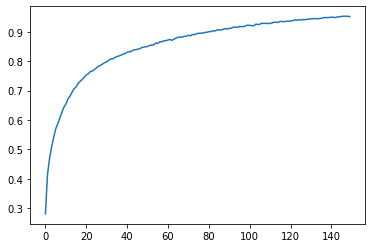

In [13]:
import matplotlib.pyplot as plt

plt.plot(result1_1.history['acc'])
plt.show

In [14]:
# Build model
channel = 3
height = 32
width = 32
class_num = 10
norm_size = 32

model = Lenet.neural(channel=channel, height=height,width=width, classes=class_num)#网络
# model = resnet_v1(input_shape=input_shape, depth=depth)
mass = MaSS(lr = learning_rate, alpha = 0.05, kappa_t = 24)
model.compile(loss='categorical_crossentropy',
              optimizer=mass,
              metrics=['accuracy'])
model.summary()

# Prepare model saving directory.
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'cifar10_%s_model_mass.{epoch:03d}.h5' % model_type
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
filepath = os.path.join(save_dir, model_name)
checkpoint = ModelCheckpoint(filepath=filepath,
                             monitor='val_acc',
                             verbose=1,
                             save_best_only=False)
callbacks = [checkpoint]

# Training
if not data_augmentation:
    result1_2 = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True,
              callbacks=callbacks)
else:
    print('Using real-time data augmentation.')

    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,           	# set input mean to 0 over the dataset
        samplewise_center=False,            	# set each sample mean to 0        
        featurewise_std_normalization=False,    # divide inputs by std of dataset        
        samplewise_std_normalization=False,     # divide each input by its std
        zca_whitening=False,                    # apply ZCA whitening        
        rotation_range=0,                       # randomly rotate images in the range (deg 0 to 180)        
        width_shift_range=0.1,                  # randomly shift images horizontally        
        height_shift_range=0.1,                 # randomly shift images vertically        
        horizontal_flip=True,                   # randomly flip images        
        vertical_flip=False)                    # randomly flip images

    res1_2 = datagen.fit(x_train)
    # Fit the model on the batches generated by datagen.flow().
    result1_2 = model.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size),
                        validation_data=(x_test, y_test),
                        epochs=epochs, verbose=1, workers=4,
                                 callbacks=callbacks)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv2D)               (None, 32, 32, 64)        4864      
_________________________________________________________________
pool1 (MaxPooling2D)         (None, 16, 16, 64)        0         
_________________________________________________________________
conv2 (Conv2D)               (None, 16, 16, 64)        102464    
_________________________________________________________________
pool2 (MaxPooling2D)         (None, 8, 8, 64)          0         
_________________________________________________________________
conv3 (Conv2D)               (None, 8, 8, 128)         204928    
_________________________________________________________________
pool3 (MaxPooling2D)         (None, 4, 4, 128)         0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 2048)              0         
__________

782/782 [==============================] - 9s 12ms/step - loss: 0.7124 - acc: 0.7521 - val_loss: 0.7429 - val_acc: 0.7435

Epoch 00030: saving model to C:\Users\dy1y19\saved_models\cifar10_ResNet32v1_model_mass.030.h5
Epoch 31/150
782/782 [==============================] - 9s 12ms/step - loss: 0.7035 - acc: 0.7562 - val_loss: 0.7182 - val_acc: 0.7530

Epoch 00031: saving model to C:\Users\dy1y19\saved_models\cifar10_ResNet32v1_model_mass.031.h5
Epoch 32/150
782/782 [==============================] - 9s 11ms/step - loss: 0.6864 - acc: 0.7614 - val_loss: 0.7630 - val_acc: 0.7424

Epoch 00032: saving model to C:\Users\dy1y19\saved_models\cifar10_ResNet32v1_model_mass.032.h5
Epoch 33/150
782/782 [==============================] - 9s 11ms/step - loss: 0.6754 - acc: 0.7628 - val_loss: 0.6988 - val_acc: 0.7578

Epoch 00033: saving model to C:\Users\dy1y19\saved_models\cifar10_ResNet32v1_model_mass.033.h5
Epoch 34/150
782/782 [==============================] - 9s 11ms/step - loss: 0.6715 - acc

782/782 [==============================] - 9s 11ms/step - loss: 0.4497 - acc: 0.8432 - val_loss: 0.6118 - val_acc: 0.7963

Epoch 00065: saving model to C:\Users\dy1y19\saved_models\cifar10_ResNet32v1_model_mass.065.h5
Epoch 66/150
782/782 [==============================] - 9s 12ms/step - loss: 0.4480 - acc: 0.8431 - val_loss: 0.6247 - val_acc: 0.7928

Epoch 00066: saving model to C:\Users\dy1y19\saved_models\cifar10_ResNet32v1_model_mass.066.h5
Epoch 67/150
782/782 [==============================] - 9s 11ms/step - loss: 0.4441 - acc: 0.8455 - val_loss: 0.5901 - val_acc: 0.8026

Epoch 00067: saving model to C:\Users\dy1y19\saved_models\cifar10_ResNet32v1_model_mass.067.h5
Epoch 68/150
782/782 [==============================] - 9s 11ms/step - loss: 0.4335 - acc: 0.8489 - val_loss: 0.6147 - val_acc: 0.7997

Epoch 00068: saving model to C:\Users\dy1y19\saved_models\cifar10_ResNet32v1_model_mass.068.h5
Epoch 69/150
782/782 [==============================] - 9s 11ms/step - loss: 0.4327 - acc


Epoch 00100: saving model to C:\Users\dy1y19\saved_models\cifar10_ResNet32v1_model_mass.100.h5
Epoch 101/150
782/782 [==============================] - 9s 11ms/step - loss: 0.3117 - acc: 0.8906 - val_loss: 0.5980 - val_acc: 0.8164

Epoch 00101: saving model to C:\Users\dy1y19\saved_models\cifar10_ResNet32v1_model_mass.101.h5
Epoch 102/150
782/782 [==============================] - 9s 12ms/step - loss: 0.3084 - acc: 0.8917 - val_loss: 0.5992 - val_acc: 0.8182

Epoch 00102: saving model to C:\Users\dy1y19\saved_models\cifar10_ResNet32v1_model_mass.102.h5
Epoch 103/150
782/782 [==============================] - 9s 12ms/step - loss: 0.3039 - acc: 0.8917 - val_loss: 0.6117 - val_acc: 0.8153

Epoch 00103: saving model to C:\Users\dy1y19\saved_models\cifar10_ResNet32v1_model_mass.103.h5
Epoch 104/150
782/782 [==============================] - 9s 11ms/step - loss: 0.3025 - acc: 0.8931 - val_loss: 0.6292 - val_acc: 0.8178

Epoch 00104: saving model to C:\Users\dy1y19\saved_models\cifar10_ResNe

782/782 [==============================] - 9s 11ms/step - loss: 0.2249 - acc: 0.9200 - val_loss: 0.6618 - val_acc: 0.8231

Epoch 00136: saving model to C:\Users\dy1y19\saved_models\cifar10_ResNet32v1_model_mass.136.h5
Epoch 137/150
782/782 [==============================] - 9s 12ms/step - loss: 0.2168 - acc: 0.9247 - val_loss: 0.6607 - val_acc: 0.8247

Epoch 00137: saving model to C:\Users\dy1y19\saved_models\cifar10_ResNet32v1_model_mass.137.h5
Epoch 138/150
782/782 [==============================] - 9s 12ms/step - loss: 0.2218 - acc: 0.9218 - val_loss: 0.6791 - val_acc: 0.8175

Epoch 00138: saving model to C:\Users\dy1y19\saved_models\cifar10_ResNet32v1_model_mass.138.h5
Epoch 139/150
782/782 [==============================] - 9s 12ms/step - loss: 0.2115 - acc: 0.9261 - val_loss: 0.6640 - val_acc: 0.8205

Epoch 00139: saving model to C:\Users\dy1y19\saved_models\cifar10_ResNet32v1_model_mass.139.h5
Epoch 140/150
782/782 [==============================] - 9s 11ms/step - loss: 0.2130 -

<function matplotlib.pyplot.show(*args, **kw)>

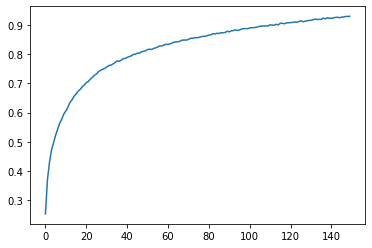

In [15]:
import matplotlib.pyplot as plt

plt.plot(result1_2.history['acc'])
plt.show

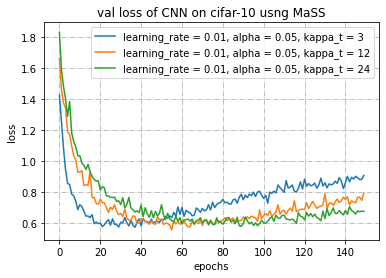

In [16]:
plt.plot(result1.history['val_loss'],label='learning_rate = 0.01, alpha = 0.05, kappa_t = 3')
plt.plot(result1_1.history['val_loss'],label='learning_rate = 0.01, alpha = 0.05, kappa_t = 12')
plt.plot(result1_2.history['val_loss'],label='learning_rate = 0.01, alpha = 0.05, kappa_t = 24')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title("val loss of CNN on cifar-10 usng MaSS")
plt.grid(linestyle='-.')
plt.legend()
plt.show() 

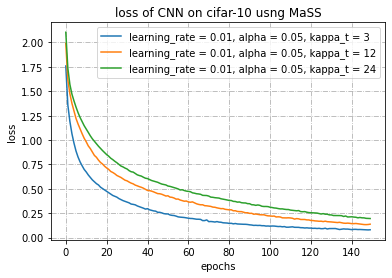

In [17]:
plt.plot(result1.history['loss'],label='learning_rate = 0.01, alpha = 0.05, kappa_t = 3')
plt.plot(result1_1.history['loss'],label='learning_rate = 0.01, alpha = 0.05, kappa_t = 12')
plt.plot(result1_2.history['loss'],label='learning_rate = 0.01, alpha = 0.05, kappa_t = 24')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title("loss of CNN on cifar-10 usng MaSS")
plt.grid(linestyle='-.')
plt.legend()
plt.show() 

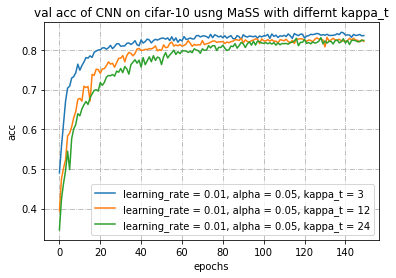

In [18]:
plt.plot(result1.history['val_acc'],label='learning_rate = 0.01, alpha = 0.05, kappa_t = 3')
plt.plot(result1_1.history['val_acc'],label='learning_rate = 0.01, alpha = 0.05, kappa_t = 12')
plt.plot(result1_2.history['val_acc'],label='learning_rate = 0.01, alpha = 0.05, kappa_t = 24')
plt.xlabel('epochs')
plt.xlabel('epochs')
plt.ylabel('acc')
plt.title("val acc of CNN on cifar-10 usng MaSS with differnt kappa_t")
plt.grid(linestyle='-.')
plt.legend()
plt.show() 

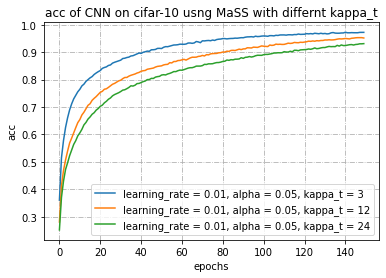

In [19]:
plt.plot(result1.history['acc'],label='learning_rate = 0.01, alpha = 0.05, kappa_t = 3')
plt.plot(result1_1.history['acc'],label='learning_rate = 0.01, alpha = 0.05, kappa_t = 12')
plt.plot(result1_2.history['acc'],label='learning_rate = 0.01, alpha = 0.05, kappa_t = 24')
plt.xlabel('epochs')
plt.xlabel('epochs')
plt.ylabel('acc')
plt.title("acc of CNN on cifar-10 usng MaSS with differnt kappa_t")
plt.grid(linestyle='-.')
plt.legend()
plt.show() 

In [21]:
# model = resnet_v1(input_shape=input_shape, depth=depth)

model = Lenet.neural(channel=channel, height=height,width=width, classes=class_num)#网络

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])
model.summary()

# Prepare model saving directory.
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'cifar10_%s_model_mass.{epoch:03d}.h5' % model_type
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
filepath = os.path.join(save_dir, model_name)
checkpoint = ModelCheckpoint(filepath=filepath,
                             monitor='val_acc',
                             verbose=1,
                             save_best_only=False)
callbacks = [checkpoint]

# Training
if not data_augmentation:
    result3 = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True,
              callbacks=callbacks)
else:
    print('Using real-time data augmentation.')

    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,           	# set input mean to 0 over the dataset
        samplewise_center=False,            	# set each sample mean to 0        
        featurewise_std_normalization=False,    # divide inputs by std of dataset        
        samplewise_std_normalization=False,     # divide each input by its std
        zca_whitening=False,                    # apply ZCA whitening        
        rotation_range=0,                       # randomly rotate images in the range (deg 0 to 180)        
        width_shift_range=0.1,                  # randomly shift images horizontally        
        height_shift_range=0.1,                 # randomly shift images vertically        
        horizontal_flip=True,                   # randomly flip images        
        vertical_flip=False)                    # randomly flip images

    res3 = datagen.fit(x_train)
    # Fit the model on the batches generated by datagen.flow().
    result3 = model.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size),
                        validation_data=(x_test, y_test),
                        epochs=epochs, verbose=1, workers=4,
                                 callbacks=callbacks)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv2D)               (None, 32, 32, 64)        4864      
_________________________________________________________________
pool1 (MaxPooling2D)         (None, 16, 16, 64)        0         
_________________________________________________________________
conv2 (Conv2D)               (None, 16, 16, 64)        102464    
_________________________________________________________________
pool2 (MaxPooling2D)         (None, 8, 8, 64)          0         
_________________________________________________________________
conv3 (Conv2D)               (None, 8, 8, 128)         204928    
_________________________________________________________________
pool3 (MaxPooling2D)         (None, 4, 4, 128)         0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 2048)              0         
__________

782/782 [==============================] - 9s 12ms/step - loss: 0.3508 - acc: 0.8790 - val_loss: 0.6238 - val_acc: 0.81461s - loss: 0.

Epoch 00029: saving model to C:\Users\dy1y19\saved_models\cifar10_ResNet32v1_model_mass.029.h5
Epoch 30/150
782/782 [==============================] - 9s 12ms/step - loss: 0.3490 - acc: 0.8771 - val_loss: 0.6303 - val_acc: 0.8156

Epoch 00030: saving model to C:\Users\dy1y19\saved_models\cifar10_ResNet32v1_model_mass.030.h5
Epoch 31/150
782/782 [==============================] - 9s 12ms/step - loss: 0.3417 - acc: 0.8809 - val_loss: 0.6119 - val_acc: 0.8166

Epoch 00031: saving model to C:\Users\dy1y19\saved_models\cifar10_ResNet32v1_model_mass.031.h5
Epoch 32/150
782/782 [==============================] - 9s 12ms/step - loss: 0.3354 - acc: 0.8812 - val_loss: 0.6368 - val_acc: 0.8095s: 0.3

Epoch 00032: saving model to C:\Users\dy1y19\saved_models\cifar10_ResNet32v1_model_mass.032.h5
Epoch 33/150
782/782 [==============================] - 9s 12ms/step -


Epoch 00064: saving model to C:\Users\dy1y19\saved_models\cifar10_ResNet32v1_model_mass.064.h5
Epoch 65/150
782/782 [==============================] - 9s 12ms/step - loss: 0.2418 - acc: 0.9149 - val_loss: 0.7420 - val_acc: 0.8192

Epoch 00065: saving model to C:\Users\dy1y19\saved_models\cifar10_ResNet32v1_model_mass.065.h5
Epoch 66/150
782/782 [==============================] - 9s 11ms/step - loss: 0.2354 - acc: 0.9181 - val_loss: 0.7112 - val_acc: 0.8222

Epoch 00066: saving model to C:\Users\dy1y19\saved_models\cifar10_ResNet32v1_model_mass.066.h5
Epoch 67/150
782/782 [==============================] - 9s 12ms/step - loss: 0.2375 - acc: 0.9177 - val_loss: 0.7404 - val_acc: 0.8198

Epoch 00067: saving model to C:\Users\dy1y19\saved_models\cifar10_ResNet32v1_model_mass.067.h5
Epoch 68/150
782/782 [==============================] - 9s 11ms/step - loss: 0.2361 - acc: 0.9191 - val_loss: 0.7593 - val_acc: 0.8199

Epoch 00068: saving model to C:\Users\dy1y19\saved_models\cifar10_ResNet32v

782/782 [==============================] - 9s 12ms/step - loss: 0.1952 - acc: 0.9336 - val_loss: 0.8435 - val_acc: 0.8137

Epoch 00100: saving model to C:\Users\dy1y19\saved_models\cifar10_ResNet32v1_model_mass.100.h5
Epoch 101/150
782/782 [==============================] - 9s 12ms/step - loss: 0.1949 - acc: 0.9317 - val_loss: 0.7897 - val_acc: 0.8248

Epoch 00101: saving model to C:\Users\dy1y19\saved_models\cifar10_ResNet32v1_model_mass.101.h5
Epoch 102/150
782/782 [==============================] - 9s 12ms/step - loss: 0.2016 - acc: 0.9307 - val_loss: 0.8054 - val_acc: 0.8187

Epoch 00102: saving model to C:\Users\dy1y19\saved_models\cifar10_ResNet32v1_model_mass.102.h5
Epoch 103/150
782/782 [==============================] - 9s 11ms/step - loss: 0.1926 - acc: 0.9328 - val_loss: 0.8103 - val_acc: 0.8228

Epoch 00103: saving model to C:\Users\dy1y19\saved_models\cifar10_ResNet32v1_model_mass.103.h5
Epoch 104/150
782/782 [==============================] - 9s 12ms/step - loss: 0.1993 -

782/782 [==============================] - 9s 11ms/step - loss: 0.1758 - acc: 0.9400 - val_loss: 0.9129 - val_acc: 0.8212

Epoch 00135: saving model to C:\Users\dy1y19\saved_models\cifar10_ResNet32v1_model_mass.135.h5
Epoch 136/150
782/782 [==============================] - 9s 12ms/step - loss: 0.1816 - acc: 0.9394 - val_loss: 0.8517 - val_acc: 0.8237

Epoch 00136: saving model to C:\Users\dy1y19\saved_models\cifar10_ResNet32v1_model_mass.136.h5
Epoch 137/150
782/782 [==============================] - 9s 11ms/step - loss: 0.1744 - acc: 0.9408 - val_loss: 0.8295 - val_acc: 0.8255

Epoch 00137: saving model to C:\Users\dy1y19\saved_models\cifar10_ResNet32v1_model_mass.137.h5
Epoch 138/150
782/782 [==============================] - 9s 11ms/step - loss: 0.1760 - acc: 0.9411 - val_loss: 0.8783 - val_acc: 0.8201

Epoch 00138: saving model to C:\Users\dy1y19\saved_models\cifar10_ResNet32v1_model_mass.138.h5
Epoch 139/150
782/782 [==============================] - 9s 11ms/step - loss: 0.1834 -

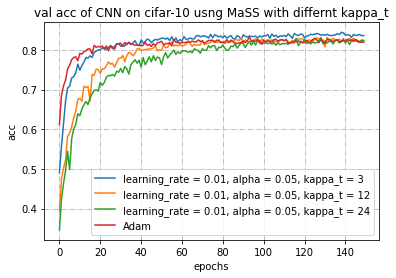

In [22]:
plt.plot(result1.history['val_acc'],label='learning_rate = 0.01, alpha = 0.05, kappa_t = 3')
plt.plot(result1_1.history['val_acc'],label='learning_rate = 0.01, alpha = 0.05, kappa_t = 12')
plt.plot(result1_2.history['val_acc'],label='learning_rate = 0.01, alpha = 0.05, kappa_t = 24')
plt.plot(result3.history['val_acc'],label='Adam')
plt.xlabel('epochs')
plt.xlabel('epochs')
plt.ylabel('acc')
plt.title("val acc of CNN on cifar-10 usng MaSS with differnt kappa_t")
plt.grid(linestyle='-.')
plt.legend()
plt.show() 

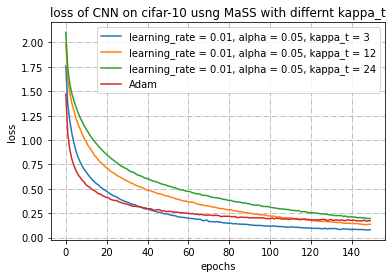

In [23]:
plt.plot(result1.history['loss'],label='learning_rate = 0.01, alpha = 0.05, kappa_t = 3')
plt.plot(result1_1.history['loss'],label='learning_rate = 0.01, alpha = 0.05, kappa_t = 12')
plt.plot(result1_2.history['loss'],label='learning_rate = 0.01, alpha = 0.05, kappa_t = 24')
plt.plot(result3.history['loss'],label='Adam')
plt.xlabel('epochs')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title("loss of CNN on cifar-10 usng MaSS with differnt kappa_t")
plt.grid(linestyle='-.')
plt.legend()
plt.show() 